# 1- Coding

## Problem

Seems like the following function has an error. The function returns random values from a
list, given the weights. For example: weighted_random([1, 2, 3], [0.5, 0.3, 0.2]), should return 1
with 50% of probabilities, 2 with 30% and 3 with 20%.

Objective: Evaluate if there’s any error. If it has it, fix it with the proper explanation.

## Solution

First, before taking a look at the weighted_random function we will build another function to run it a singnificant amount of times and graph the result in a bar plot.

In [1]:
import random
import seaborn as sns; sns.set(); sns.set_style("darkgrid", {"axes.facecolor": ".95"})
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def run_and_graph(func, iterations):
    output = np.zeros(iterations)

    for i in range(iterations):
        output[i] = func([1, 2, 3], [0.5, 0.3, 0.2])

    unique, counts = np.unique(output, return_counts=True)
    pertentages = counts/iterations
    
    plt.bar(unique, pertentages, color="indigo")
    plt.xticks(unique)
    plt.xlabel('Values')
    plt.ylabel("Percentage")
    plt.show()

Once we've done that, we're going to take a look at the function itself and its output.

In [3]:
def weighted_random(values, weights):
    total_weight = sum(weights)
    acum_weights = [w / total_weight for w in weights[:]]
    for i in range(len(weights)):
        acum_weights[i] += acum_weights[i]
    rand = random.random()
    for value, weight in zip(values, acum_weights):
        if weight > rand:
            return value

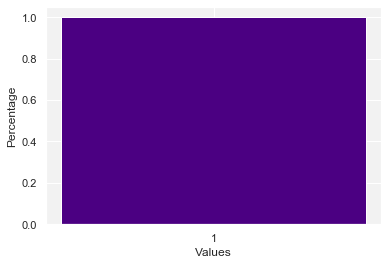

In [4]:
run_and_graph(weighted_random, 10000)

So, after running it a couple of times (10000 times to be exact), we notice that we're getting the same result every time, which means that the output of the function is 1 100% of the times, while it never returns 2 nor 3.

Why is that? Well, mainly because of two things:

On the first place, by doubling the acum_weights on the first for loop, it's more likely that our randomly generated number will be lesser than the evaluated weight. In order to solve that we can either delete the first for loop altogether or multiply our random number by two. In this case, we're going with the first solution.

Secondly, if the random number happens to be greater than all of the weights, the function won't return any value. To fix that, we can substract the evaluated weight from the random number before the end of the loop. That way, we're making sure that the (weight > rand) condition will be true for some value on every run, because the sum of the acum_weights equals the biggest value the random function can return, which is 1.

After making those changes, we get the following output:

In [5]:
def new_weighted_random(values, weights):
    total_weight = sum(weights)
    acum_weights = [w / total_weight for w in weights[:]]
    
    rand = random.random()
    for value, weight in zip(values, acum_weights):
        if weight > rand:
            return value
        else:
            rand -= weight # Substract the weight from the random number

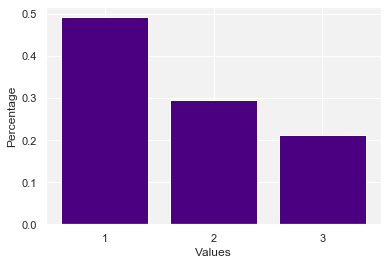

In [6]:
run_and_graph(new_weighted_random, 10000)

Now we can see the percentage of times each output has been produced by our function, which coincides with the expected output.